In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## Les importation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

sns.set(rc={'figure.figsize':(10,10)})

In [3]:
# %cd drive/MyDrive/kaggle/titani_comp/

# Load datasets

In [4]:
train = pd.read_csv("../input/titanic/train.csv") #le dataset pour l entrainement
# test = pd.read_csv("./data/test.csv")   # le dataset pour le test 

In [5]:
train.shape

(891, 12)

# Data cleaning & exploration 

In [6]:
#delete dupliates rows 
train.drop_duplicates()
train.shape # no dupliate ros

(891, 12)

In [7]:
# test if there are missing values 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#delete the rows that cccontain at least 3 missing values
train = train.dropna(axis=0, thresh=2)

In [9]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
236,237,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S


In [10]:
# the columns type 
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Traitement de la column  Survived

In [11]:
train['Survived'].unique()

array([0, 1])

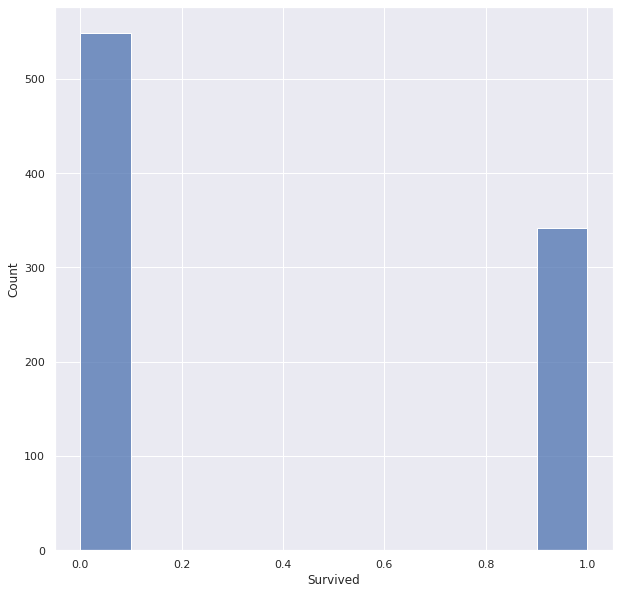

In [12]:
_ =sns.histplot(data = train, x='Survived', bins=10, stat="count")

In [13]:
train['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

On remarque que le nombre des non survivant est bcp plus que celui des survivant 

## Traitement de la column Pclass

In [14]:
train['Pclass'].isna().sum() # pas de valeurs manquantes 

0

In [15]:
train['Pclass'].value_counts() # y a plus de gents dans la classe 3 

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Percent'>

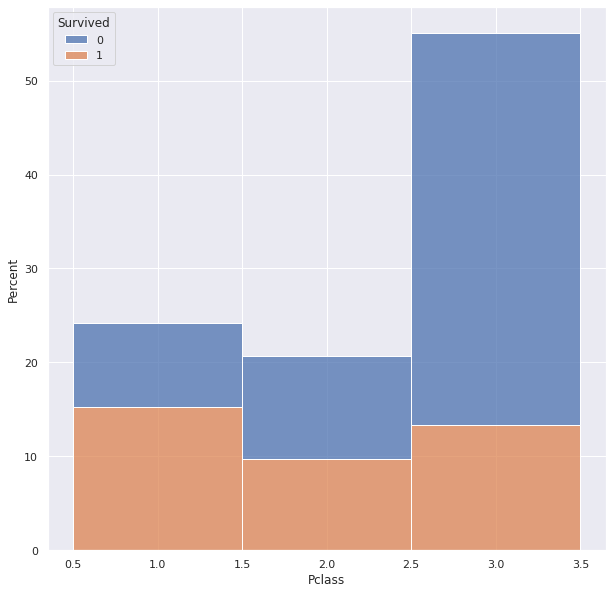

In [16]:
# la distribution des classe en fonction de survived 

sns.histplot(data=train, x="Pclass", hue="Survived", discrete=True, multiple="stack", stat="percent")

Remarque: 
on remarque que la classe ou les gents on plus survecu est la première classe contrairement à la troisième classe 

## Traitement colonne **Name**

In [17]:
print(train.Name.isnull().sum()) # pas de variable manquant 
print(train.Name.isna().sum())
print(train.Name.unique().shape) # tous le noms sont différents

0
0
(891,)


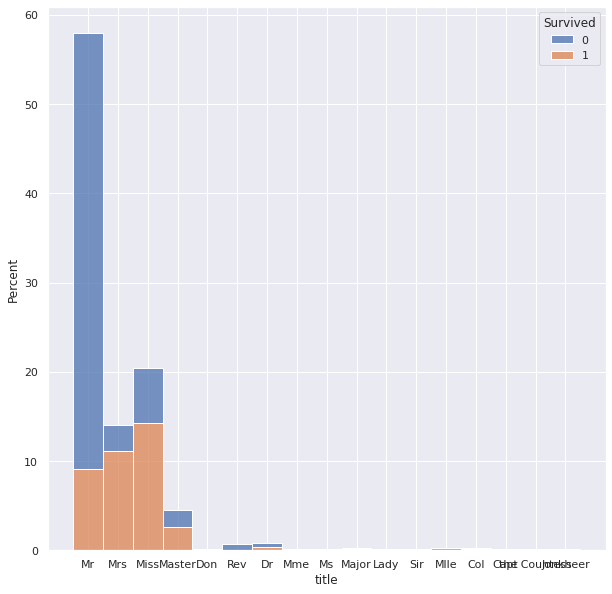

In [18]:
train["title"] = train.Name.apply(lambda x: x.split(", ")[1].split(".")[0]) 
sns.histplot(data=train, x="title", hue="Survived", discrete=True, multiple="stack", stat="percent")
plt.show()

Remarque: 
La plupart des passagers sont des Mr, Mrs et Miss

## Traitement de la column Sex

In [19]:
train['Sex'].isna().sum() # pas de valeurs manquantes 

0

In [20]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

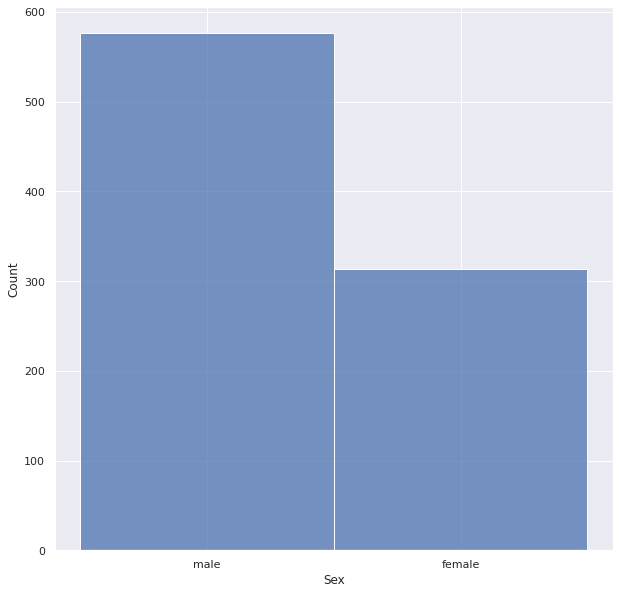

In [21]:
# la distrubution du sex 
_ =sns.histplot(data = train, x='Sex', bins=10, stat="count")

Remarque: il y a plus d'homme sur le bateau que de femme( à peu pres la moitié) 

<AxesSubplot:xlabel='Sex', ylabel='Percent'>

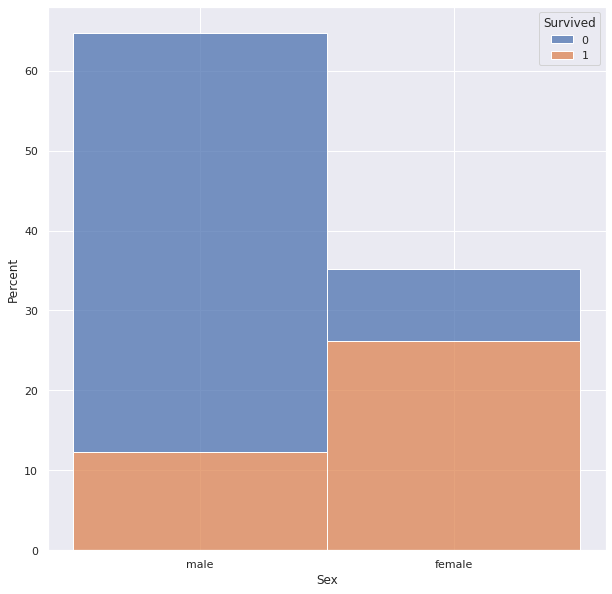

In [22]:
sns.histplot(data=train, x="Sex", hue="Survived", discrete=True, multiple="stack", stat="percent")

Remarque: plus que la moitié des femme présente sur le bateau ont été sauvé contrairment au homme ou on voit que la majorité se sont noyés

## Traitement de la column Age

In [23]:
train['Age'].isna().sum()  # on a 177 valeurs manquante dans la colonne age 

177

In [24]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Remarque : La majorité des passagers ont un age entre 10 et 50 ans 

In [25]:
train["Age"].isna().sum() #  on a des valeurs manquantes à traiter plus tard

177

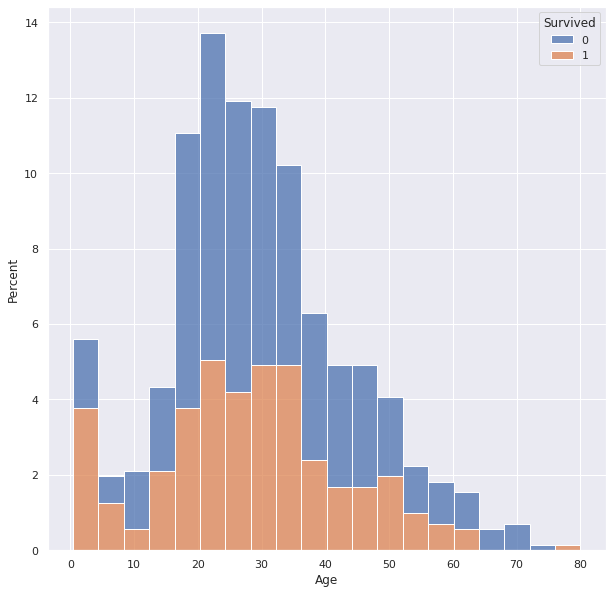

In [26]:
sns.histplot(data=train, x="Age", hue="Survived", discrete=False, multiple="stack", stat="percent")
plt.show()

Remarque: 
  - la proportion des enfant en bas age sauvés est plus grande que celle noyés
  - Avec l'avance de l'ages le nombre de personne sauvé diminue 
  les 25-30 ans sont les plus noyés 
  - une descrittisation de l'age sera faite plus tard 

## Age VS Sex Vs Survived

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

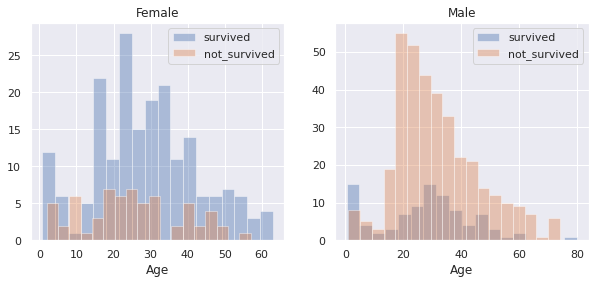

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4)) # un figure en deux colonne 
women = train[train['Sex']=='female'] # un subdataset de femme 
men = train[train['Sex']=='male'] # un subdataset de homme

ax = sns.distplot(women[women['Survived']==1].Age, bins=18, label = 'survived', ax = axes[0], kde =False) #les femme survecu
ax = sns.distplot(women[women['Survived']==0].Age, bins=18, label = 'not_survived', ax = axes[0], kde =False) # les femme non survecu
ax.legend()
ax.set_title('Female')


ax = sns.distplot(men[men['Survived']==1].Age, bins=18, label = 'survived', ax = axes[1], kde =False) #les homme survecu
ax = sns.distplot(men[men['Survived']==0].Age, bins=18, label = 'not_survived', ax = axes[1], kde =False) # les fhomme non survecu
ax.legend()
ax.set_title('Male')

Remarque 

   - les femmes entre 15 et 40 ans ont une plus grand probabilité de survive. 
    la proportion des femmes non survecus est plus  faible que celle sauvés quel que    soit   l'age
 
 - Les homme entre 15 et 50 ans ont eu une plus faible probabilité de survivre
 la proportion des homme noyéa et suppérieur à celle sauvés

 - Dans tous les cas les enfants ont une plus petite probabilité de survivre par rapport au autre ages

Remarque : La majorité des passagers ont un age entre 10 et 50 ans 

## Traitement de la column SibSp

In [28]:
train['SibSp'].isna().sum() # pas de valeurs manquantes

0

In [29]:

train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

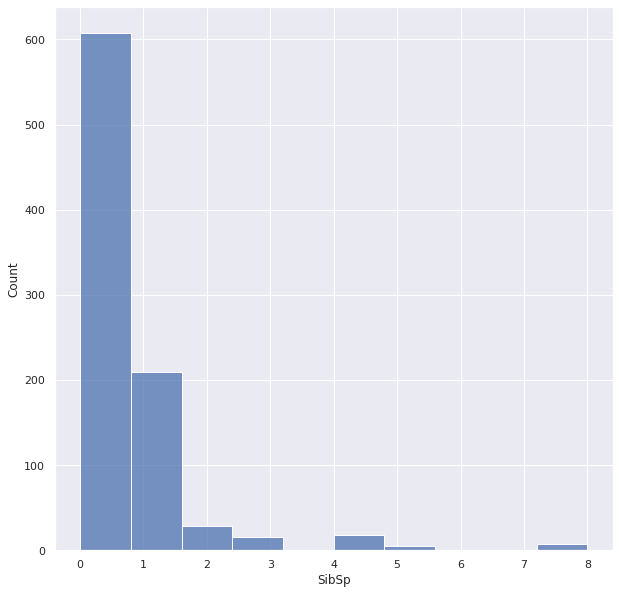

In [30]:
#la distribution de la variable SibSp 
_ =sns.histplot(data = train, x='SibSp', bins=10, stat="count")



Remarque: 
on remarque que y a bcp de personne qui n'ont pas un frère/soeur/demi_frere/demi soeurs présent sur le bateau. Y en a un nombre non négligable de famille avec 1 enfants mais de moins en moins de famille avec 2 et plus d'enfants.

Pour ce qui suit on simplifie cette variable on remplacent tous ceux qui possède au moin 1 frère ... par 1. 


<AxesSubplot:xlabel='SibSp', ylabel='Percent'>

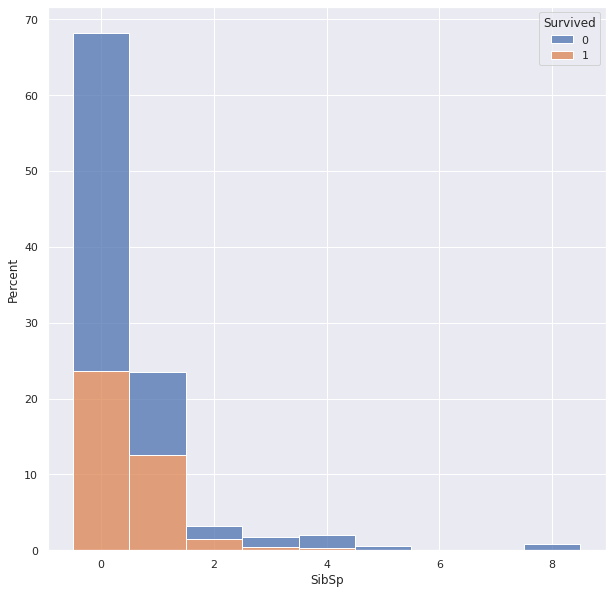

In [31]:
sns.histplot(data=train, x="SibSp", hue="Survived", discrete=True, multiple="stack", stat="percent")

Remarque: 
La proportion des personnes qui ont 0,1 ou 2 frere sur le bateau on été les plus survecus. Néamoin dans les deux cas le nombre de personne noyés est supérieurs à celui sauvé.

## Pclass VS SibSp





<AxesSubplot:xlabel='SibSp', ylabel='Percent'>

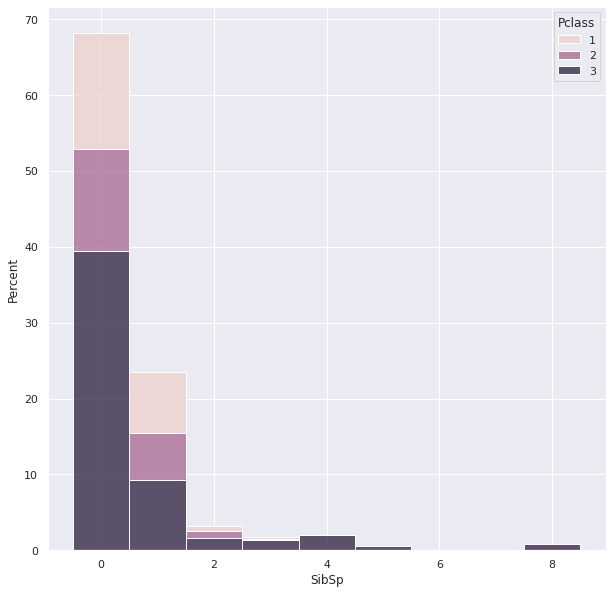

In [32]:
sns.histplot(data=train, x="SibSp",hue="Pclass", discrete=True, multiple="stack", stat="percent")

Commentaire: 


Les gens qui sont sont frère sur le bateau sont nombreux par rapport au gens qui sont venue avec leurs frère est ce dans toutes les clase et même à l'intérieur de la même classe

## Traitement de la column Parch

In [33]:
train['Parch'].isna().sum() # on a renseigné tous les passagère le nombre de parents présents sur le bateau

0

In [34]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

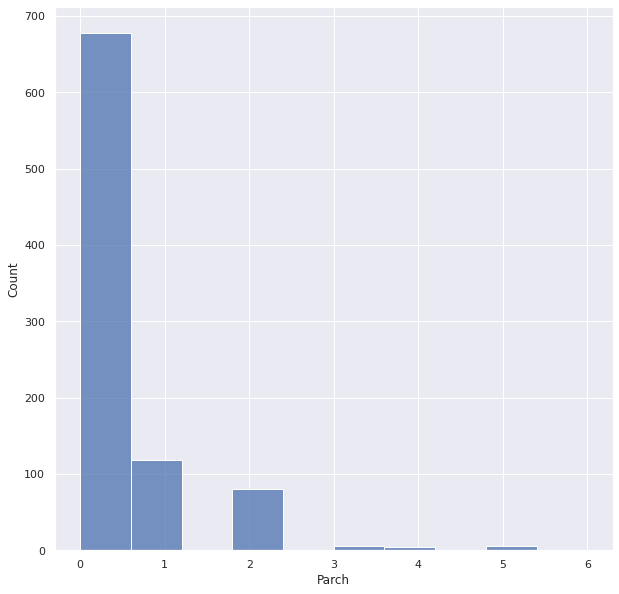

In [35]:
# la distribution de la varaible Parch 
_ =sns.histplot(data = train, x='Parch', bins=10, stat="count")

<AxesSubplot:xlabel='Parch', ylabel='Percent'>

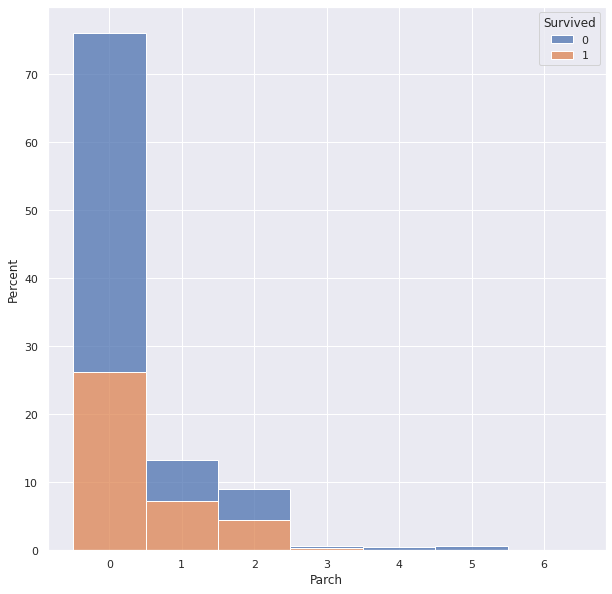

In [36]:

sns.histplot(data=train, x="Parch", hue="Survived", discrete=True, multiple="stack", stat="percent")

Remarque: 

la moitié des personne qui ont des enfants ont été sauvés. 
les gents qui n'ont pas d'enfant sont les plus noyés juste 1/3 d'eux ont été sauvés.



## Pclass VS Parch

<AxesSubplot:xlabel='Parch', ylabel='Percent'>

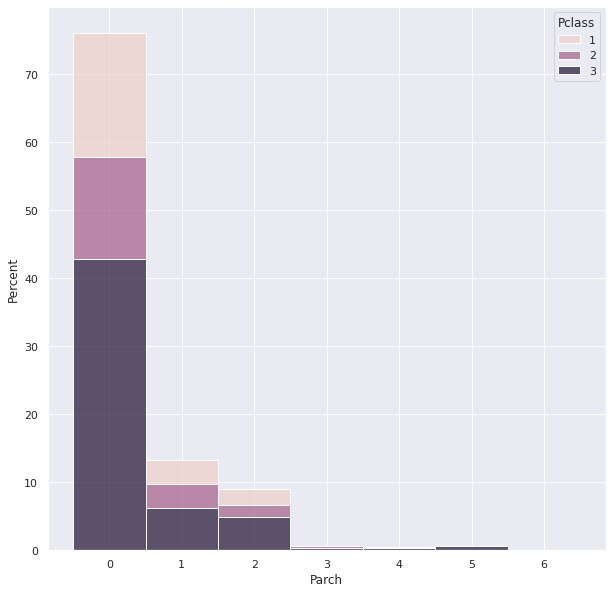

In [37]:
sns.histplot(data=train, x="Parch",hue="Pclass", discrete=True, multiple="stack", stat="percent")

Remarque: 

  La plupart des passagers n'ont pas d'enfant est ce valable dans toutes les classe et même à l'interieure de la même classe

## Le traitement de la variable Ticket 

In [38]:
train.Ticket.isna().sum() # pas de valeurs manquantes
print(train.Ticket.unique().shape)
train.Name.isna().sum() # pas de valeurs manquantes
print(train.Name.unique().shape)

(681,)
(891,)


Remarque: 

  Y a des tickets qui été utilisés par plusieurs passagers

Remarque:

  Dans la suite cette feature ne sera pas pris en considération dans la construcction du model vu qu'elle apporte peu d'information.

## Traitement de la variable Fare

In [39]:
train.Fare.isna().sum() # pas de valeurs manquantes

0

In [40]:
train.Fare.describe()  

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

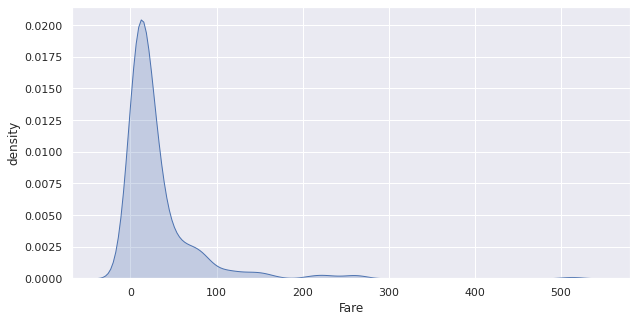

In [41]:
plt.figure(figsize=(10,5))
plt.xlabel('Fare')
plt.ylabel('density')
sns.kdeplot(train.Fare,shade=True)
plt.show()

Remarque:
  - la majorité des passagère on un Fare inférieur 40 
  - une descritisation de cette variable sera réaliser un peu plus tard 

<AxesSubplot:xlabel='Fare', ylabel='Percent'>

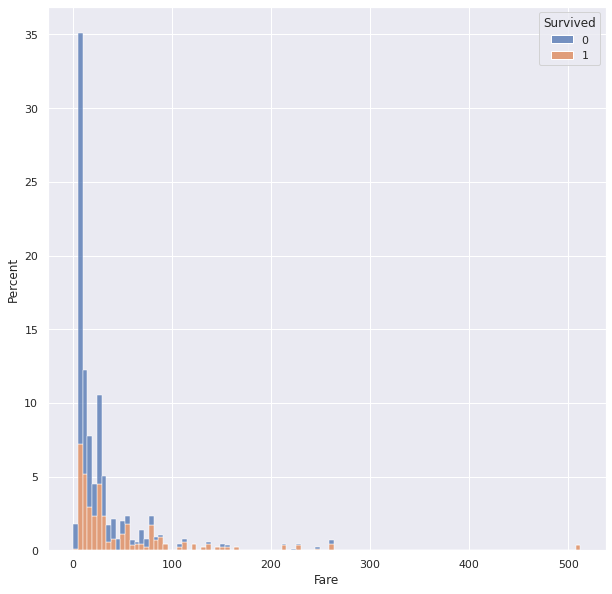

In [42]:
sns.histplot(data=train, x="Fare", hue="Survived", discrete=False, multiple="stack", stat="percent")

Remarque: 
 
  Les passagers avec un plus grand Fare on été les plus sauvés par rapport à ceux avec un Fare plus petit. 

## Traitement de la colonne Embarked

In [43]:
# On remplace les valeurs manquante dans cette colone par S car c'est la plus présente dans le dataset 
train["Embarked"] = train["Embarked"].fillna("S")

## Matrice de correlation 

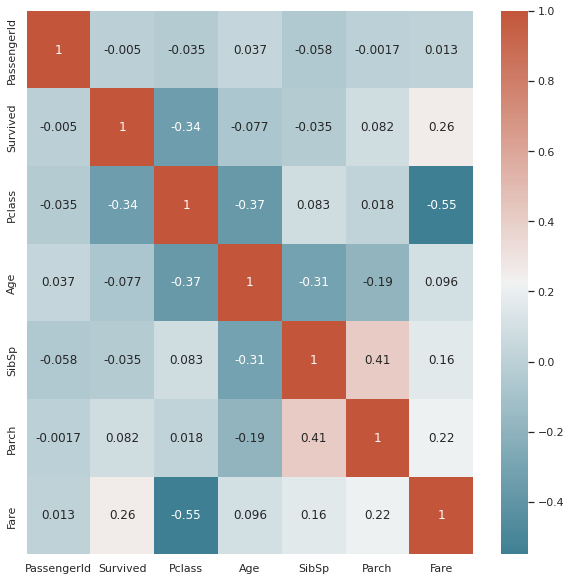

In [44]:
cormat = train.corr()
p = sns.heatmap(cormat,annot=True, cmap=sns.diverging_palette(220,20,as_cmap=True))

on a une petite corrélation entre les variable Parch et SibSp.

# Preprocessing

In [45]:
train = pd.read_csv("../input/titanic/train.csv") #le dataset pour l entrainement
test = pd.read_csv("../input/titanic/test.csv")   # le dataset pour le test 

### La variable Age

In [46]:
# dans ce qui suit on remplace les valeurs manquantes dans la colonne Age par la mediane 
# des ages du même groupe de personnes (Mrs, Mr,..)  

title_to_en = {
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Don": "Mr",
    "Rev": "Mr",
    "Dr": "Mr",
    "Major": "Mr",
    "Lady": "Ms",
    "Col": "Sir",
    "Capt": "Mr",
    "the Countess": "Mrs",
    "Jonkheer": "Mr",
}

train["title"] = train.Name.apply(lambda x: x.split(", ")[1].split(".")[0]) 
test["title"] = test.Name.apply(lambda x: x.split(", ")[1].split(".")[0])

train = train.replace(title_to_en)
test = test.replace(title_to_en)


for title in train['title'].unique():
  mean = train[train["title"] == title]['Age'].median()
  mask_train = np.logical_and((train["title"] == title).values, train['Age'].isna().values)
  mask_test = np.logical_and((test["title"] == title).values, test['Age'].isna().values)

  train.loc[mask_train, "Age"] = mean

In [47]:
# la descritisation de la variable age: 
train['AgeBand'] = pd.cut(train['Age'], 5)
print(train.AgeBand.unique())

def func(age):
  if age <= 16:
    return 0
  if age>16 and age <= 32:
    return 1
  if age>32 and age <= 48:
    return 2
  if age>48 and age <= 64:
    return 3
  return 4
    
train["eAge"] = train['Age'].apply(lambda x: func(x))
test["eAge"] = test['Age'].apply(lambda x: func(x))

train = train.drop(['AgeBand'], axis=1)   # on supprime la colonne AgeBang vu qu'elle n'est plus utile

[(16.336, 32.252], (32.252, 48.168], (48.168, 64.084], (0.34, 16.336], (64.084, 80.0]]
Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]


### La variable title

In [48]:
# on descritise la variable title

train['title'] = train['title'].replace('Mr', 1)
train['title'] = train['title'].replace('Miss', 2)
train['title'] = train['title'].replace('Ms', 2)
train['title'] = train['title'].replace('Mlle', 2)
train['title'] = train['title'].replace('Mme', 3)
train['title'] = train['title'].replace('Mrs', 3)
train['title'] = train['title'].replace('Master', 4)
train['title'] = train['title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 5)


test['title'] = test['title'].replace('Mr', 1)
test['title'] = test['title'].replace('Miss', 2)
test['title'] = test['title'].replace('Ms', 2)
test['title'] = test['title'].replace('Mlle', 2)
test['title'] = test['title'].replace('Mme', 3)
test['title'] = test['title'].replace('Mrs', 3)
test['title'] = test['title'].replace('Master', 4)
test['title'] = test['title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 5)


In [49]:
train.title.unique() 

array([1, 3, 2, 4, 5])

### La variavle FamillySize et is_alone

In [50]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['is_alone'] = np.where(train['FamilySize'].values==1, 1, 0) #1 si ==1 sinon c'est 0

test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['is_alone'] = np.where(test['FamilySize'].values==1, 1, 0) #1 si ==1 sinon c'est 0

### La variable Embarked

In [51]:
print(train['Embarked'].value_counts())
train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


### La variable Fare

In [52]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print(train.FareBand.unique())

def f(fare):
  if fare <= 7.91:
    return 0
  if fare>7.91 and fare <= 14.454:
    return 1
  if fare >14.454 and fare <= 31:
    return 2
  if fare>31:
    return 3
  return 4
    
train["ClassFare"] = train['Fare'].apply(lambda x: f(x))
train = train.drop(['FareBand'], axis=1)   # on supprime la colonne AgeBang vu qu'elle n'est plus utile

test["ClassFare"] = test['Fare'].apply(lambda x: f(x))

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]


### Création de la variable AgeClass

In [53]:
train['Age_Pclass'] = train.Age * train.Pclass
test['Age_Pclass'] = test.Age * test.Pclass

### La variable Sex

In [54]:
train['eSex'] = np.where(train['Sex'].values=='male', 1, 0) # 1 si sex==male 0 sinon
test['eSex'] = np.where(test['Sex'].values=='male', 1, 0) # 1 si sex==male 0 sinon

In [55]:
train.head() # le train final (avant la classification)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,eAge,FamilySize,is_alone,ClassFare,Age_Pclass,eSex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,2,0,0,66.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,3,2,2,0,3,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,1,1,1,78.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,3,2,2,0,3,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1,2,1,1,1,105.0,1


In [56]:
test.head() # le train final (avant la classification)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,eAge,FamilySize,is_alone,ClassFare,Age_Pclass,eSex
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2,1,2,1,1,0,103.5,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,3,2,2,0,0,141.0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2,1,3,1,1,1,124.0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,1,1,1,1,1,81.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,3,1,3,0,1,66.0,0


# Classification

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
random_seed = 42 

In [58]:
f_columns = ["Pclass", "eSex", "Embarked","title",'eAge','is_alone','ClassFare']
data = train[f_columns]

X = train[f_columns]
y = train['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [59]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

82.3

In [60]:

svc = SVC(random_state=random_seed)
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

83.57

In [61]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn


83.71

In [62]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

78.79

In [63]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

73.03

In [64]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


81.6

In [65]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

78.23

In [66]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

86.8

In [67]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

86.8

In [68]:
sub = pd.read_csv("../input/titanic/gender_submission.csv")
sub["Survived"] = decision_tree.predict(test[f_columns])
sub.to_csv("mysubmission.csv", index=False)

In [69]:
accuracy_score(y_pred=decision_tree.predict(X_test), y_true=y_test)

0.8435754189944135

In [70]:
# from sklearn import tree
# fig, ax = plt.subplots(1, 1, figsize=(200, 200))

# tree.plot_tree(decision_tree, ax=ax)